In [1]:
# import libraries

import pandas as pd
import numpy as np
import math
from numpy import random

import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

In [2]:
# read in the data

eq = pd.read_csv('/Users/juhee/Desktop/GA/lsmtmp/juhee/data/earthquakes.csv')

In [3]:
# check for null values - geocode not available for all tweets

eq.isnull().sum()

id               0
text             0
keyword       6862
user_name        0
date             0
location     10000
dtype: int64

In [4]:
# drop the columns - keyword and location

eq.drop(columns = ['keyword', 'location'], axis = 1, inplace = True)

In [5]:
# create a function to generate coordinates within given radius
# this code is my adaptation of Haversine formula
# Bob's genius brain has been input here

def get_coordinates(num, center, radius):
        
    lat, long = center
    
    # add randomness to generate latitude and longitude within the given radius
    rho = np.sqrt(np.random.uniform(0, 1, num))
    phi = np.random.uniform(0, 2 * np.pi, num)
    
    dx = rho * radius * np.cos(phi)
    dy = rho * radius * np.sin(phi)

    # create an empty list to store generated coordinates 
    coordinates = []
    
    for i in range(num):
        
        coordinate = {}
        
        # earth's mean radius is 6371 km
        new_lat = lat + ((180 / math.pi) * (dy[i] / 6371) / math.sin(lat * math.pi / 180)) 
        new_long = long + ((180 / math.pi) * (dx[i] / 6371) / math.cos(long * math.pi / 180))
        
        coordinate['lat'] = new_lat
        coordinate['long'] = new_long
        
        # add to list
        coordinates.append(coordinate)

    return coordinates

In [7]:
# enter the geolocation of your search location:
# e.g.: St. Charles Lake, LA - 30.212942, -93.218910

coordinates = get_coordinates(eq.shape[0], (40.709112, -112.101609), 150) # --> radius of collected tweets from the center

In [8]:
# create columns to store latitude and longitude separately

eq['lat'] = [coordinate['lat'] for coordinate in coordinates]
eq['long'] = [coordinate['long'] for coordinate in coordinates]

In [9]:
eq.head()

id                                               text  \
0  1241152458912673794  TK Kirkland's Reaction To Earthquake's Ex-Wife...   
1  1241152416214474753  That sound you hear is NOT an earthquake. It’s...   
2  1241152284827856896  he said he stocked up on ammo cause he knew Th...   
3  1241152178695405570  If an earthquake separates CA, WA, and OR from...   
4  1241152072818364416  #Sismo M 4 SOUTH OF BALI, #INDONESIA. 20-03-20...   

        user_name                       date        lat        long  
0        DarkDon_  2020-03-20 23:59:40+00:00  41.819701 -113.203380  
1      ReallyInID  2020-03-20 23:59:30+00:00  42.395677 -113.341676  
2       folsworth  2020-03-20 23:58:58+00:00  42.132627 -109.961223  
3        Colony14  2020-03-20 23:58:33+00:00  39.751768 -109.998406  
4  MonitorSismico  2020-03-20 23:58:08+00:00  40.338904 -113.720391

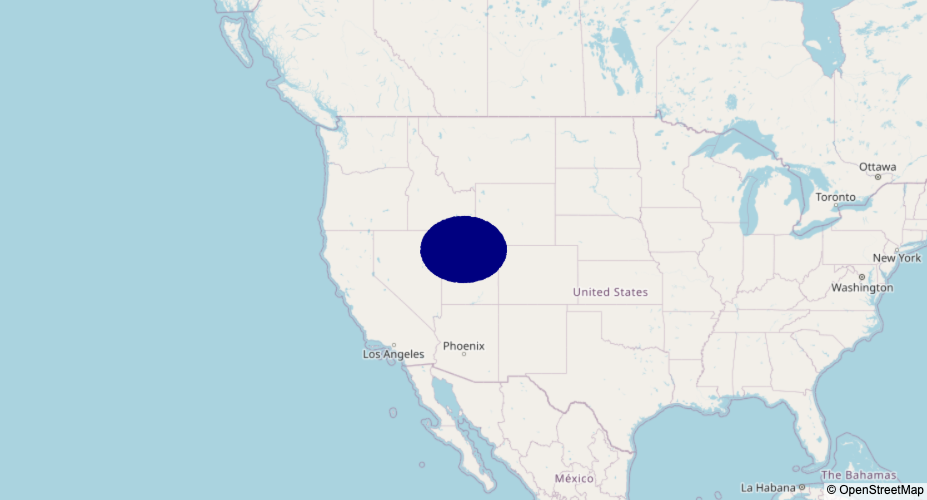

In [12]:
# check the coordinates

fig = px.scatter_mapbox(eq, lat = 'lat', lon = 'long',
                        color_discrete_sequence = ['navy'], zoom = 3, height = 500)
fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(margin = {'r': 0, 't': 0, 'l': 0, 'b':0})

# this will store the plot within jupyter
pyo.iplot(fig)

fig.write_html('/Users/juhee/Desktop/GA/lsmtmp/juhee/images/coordinates_fig1.html')

In [13]:
# save it to a csv file

eq.to_csv('/Users/juhee/Desktop/GA/lsmtmp/juhee/data/eq1_loc.csv', index = False)

### Repeat the above steps for the other 3 dataframes

#### 1. read in the data
#### 2. check the null values and drop keyword and location columns
#### 3. generate the coordinates
#### 4. check the coordinates
#### 5. save it to csv

##### ridgecrest dataset

In [14]:
rc = pd.read_csv('/Users/juhee/Desktop/GA/lsmtmp/juhee/data/ridgecrest.csv')

In [15]:
rc.isnull().sum()

id               0
text             1
keyword       5739
user_name        0
date             0
location     10000
dtype: int64

In [16]:
rc.drop(columns = ['keyword', 'location'], axis = 1, inplace = True)

In [17]:
coordinates = get_coordinates(len(rc['id']), (35.633862, -117.679367), 150) # --> radius of collected tweets from the center

rc['lat'] = [coordinate['lat'] for coordinate in coordinates]
rc['long'] = [coordinate['long'] for coordinate in coordinates]

In [18]:
rc.head()

id                                               text  \
0  1279927802381299713  A M1.5 earthquake has been reported by the USG...   
1  1279927794835656704  USGS reports a M1.5 earthquake, 35 km ESE of M...   
2  1279927679039528961  My money on Baki. His old man stopped an earth...   
3  1279927657199616000  I have those same things. But not for "earthqu...   
4  1279927624110751744  Magnitude 1.5 #earthquake, 37.0 km SE of Mina,...   

         user_name                       date        lat        long  
0     quakeupdates  2020-07-05 23:59:02+00:00  36.050068 -120.367319  
1  everyEarthquake  2020-07-05 23:59:00+00:00  35.882649 -118.307088  
2       RicanGuard  2020-07-05 23:58:33+00:00  35.551651 -116.975543  
3        DMersault  2020-07-05 23:58:28+00:00  34.492746 -116.335600  
4    NVEarthquakes  2020-07-05 23:58:20+00:00  36.554455 -117.367536

In [19]:
rc['text'][2]

'My money on Baki. His old man stopped an earthquake bro'

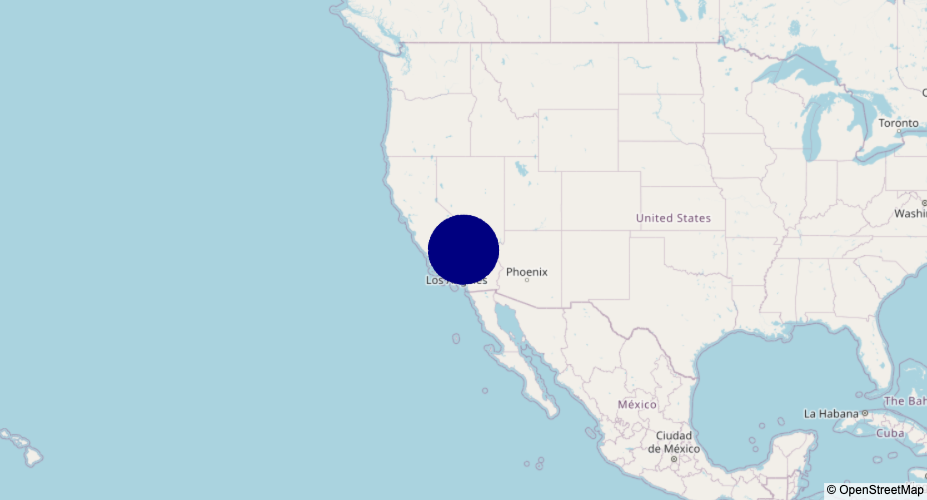

In [20]:
# check the coordinates

fig = px.scatter_mapbox(rc, lat = 'lat', lon = 'long',
                        color_discrete_sequence = ['navy'], zoom = 3, height = 500)
fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(margin = {'r': 0, 't': 0, 'l': 0, 'b':0})

pyo.iplot(fig)

fig.write_html('/Users/juhee/Desktop/GA/lsmtmp/juhee/images/coordinates_fig2.html')

In [21]:
rc.to_csv('/Users/juhee/Desktop/GA/lsmtmp/juhee/data/eq2_loc.csv', index = False)

##### whatever dataset

In [22]:
what = pd.read_csv('/Users/juhee/Desktop/GA/lsmtmp/juhee/data/whatever.csv')

In [23]:
what.isnull().sum()

id               0
text           222
keyword       9438
user_name        0
date             0
location     10000
dtype: int64

In [24]:
what.drop(columns = ['keyword', 'location'], axis = 1, inplace = True)

In [25]:
coordinates = get_coordinates(len(what['id']), (40.709112, -112.101609), 150) # --> radius of collected tweets from the center

what['lat'] = [coordinate['lat'] for coordinate in coordinates]
what['long'] = [coordinate['long'] for coordinate in coordinates]

In [26]:
what.head()

id                                               text  \
0  1241152541284544512  no les pasa que no hay tweet que se les ocurra...   
1  1241152541284536322                                                R4🚩   
2  1241152541284536321  Keep in mind that he says many things that hav...   
3  1241152541280403459  Algunos ganan exageradas sumas, que se sacrifi...   
4  1241152541276213249     Muy bueno Manu. Que pegada la del comentarista   

         user_name                       date        lat        long  
0  CarlaAlganiaraz  2020-03-20 23:59:59+00:00  41.330352 -108.901948  
1       werdumJr22  2020-03-20 23:59:59+00:00  39.794276 -113.165969  
2        JoAnnNYNY  2020-03-20 23:59:59+00:00  39.649425 -109.217843  
3     1974bogotano  2020-03-20 23:59:59+00:00  40.777739 -109.184692  
4     segundoacuna  2020-03-20 23:59:59+00:00  39.199834 -112.000748

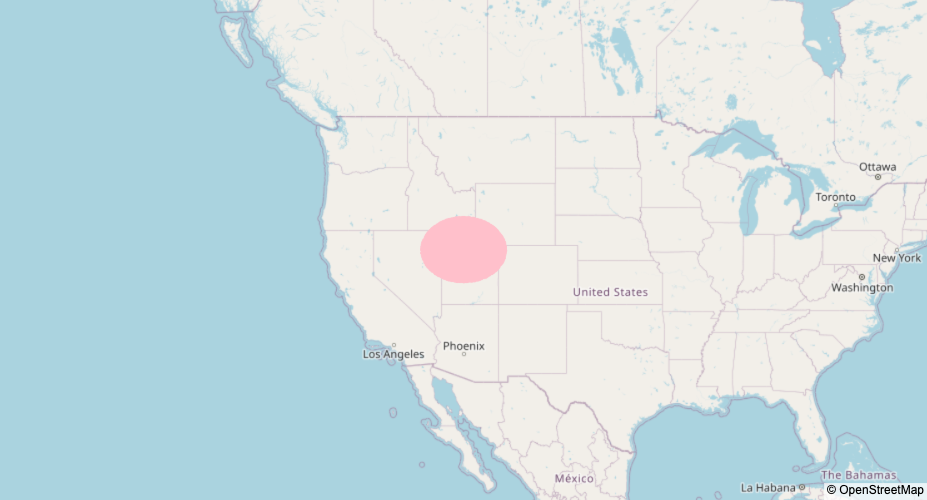

In [28]:
# check the coordinates

fig = px.scatter_mapbox(what, lat = 'lat', lon = 'long',
                        color_discrete_sequence = ['pink'], zoom = 3, height = 500)
fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(margin = {'r': 0, 't': 0, 'l': 0, 'b':0})

pyo.iplot(fig)

fig.write_html('/Users/juhee/Desktop/GA/lsmtmp/juhee/images/coordinates_fig3.html')

In [29]:
what.to_csv('/Users/juhee/Desktop/GA/lsmtmp/juhee/data/non_disaster1.csv', index = False)

##### everything dataset

In [30]:
eve = pd.read_csv('/Users/juhee/Desktop/GA/lsmtmp/juhee/data/everything.csv')

In [31]:
eve.isnull().sum()

id               0
text           233
keyword       9423
user_name        0
date             0
location     10000
dtype: int64

In [32]:
eve.drop(columns = ['keyword', 'location'], axis = 1, inplace = True)

In [33]:
coordinates = get_coordinates(len(eve['id']), (35.633862, -117.679367), 150) # --> radius of collected tweets from the center

eve['lat'] = [coordinate['lat'] for coordinate in coordinates]
eve['long'] = [coordinate['long'] for coordinate in coordinates]

In [34]:
eve.head()

id                                               text  \
0  1147294084094136320  First of all, that’s not true for everyone. I’...   
1  1147294084081442817                            なんでほんとお前そんなに上手いの、えぐすぎやろ   
2  1147294084081434624  maine huag kng magpauto sa ABS CBN huag mng ga...   
3  1147294084077195265                                           (*´つ_⊂｀)   
4  1147294084073082880                 Ah poto sebelumnya diapus. Ga asik   

        user_name                       date        lat        long  
0   Ashleyy_Raeee  2019-07-05 23:59:59+00:00  35.341492 -117.212245  
1   CHUPACABRA330  2019-07-05 23:59:59+00:00  34.062909 -117.736507  
2  pearlbalbuena1  2019-07-05 23:59:59+00:00  36.403033 -115.841219  
3    akiramikuver  2019-07-05 23:59:59+00:00  36.425128 -117.643071  
4   tommonstertom  2019-07-05 23:59:59+00:00  34.679232 -116.402057

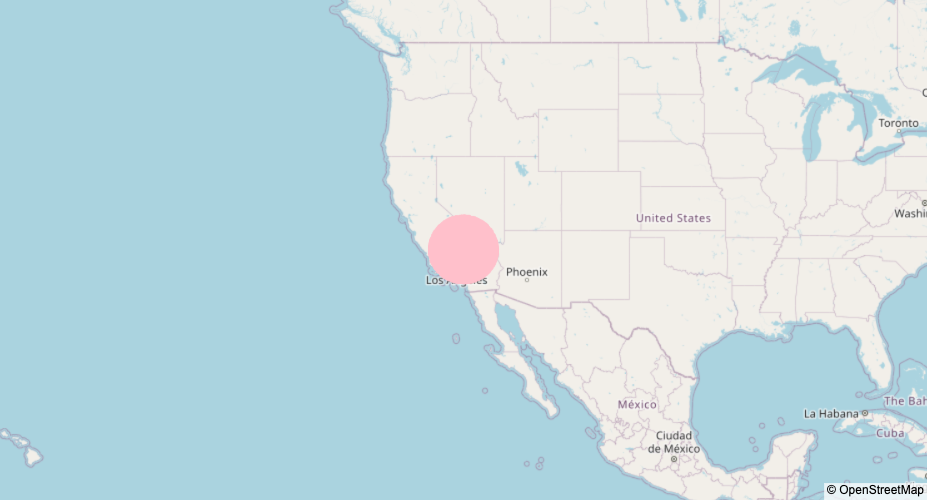

In [35]:
# check the coordinates

fig = px.scatter_mapbox(eve, lat = 'lat', lon = 'long',
                        color_discrete_sequence = ['pink'], zoom = 3, height = 500)
fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(margin = {'r': 0, 't': 0, 'l': 0, 'b':0})

pyo.iplot(fig)

fig.write_html('/Users/juhee/Desktop/GA/lsmtmp/juhee/images/coordinates_fig4.html')

In [36]:
eve.to_csv('/Users/juhee/Desktop/GA/lsmtmp/juhee/data/non_disaster2.csv', index = False)

### Combine the datasets

In [37]:
final = pd.concat([eq, rc, what, eve])

In [38]:
final.to_csv('/Users/juhee/Desktop/GA/lsmtmp/juhee/data/combined.csv', index = False)